In [55]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
# import the necessary packages
from __future__ import print_function
from sklearn import cluster
import numpy as np
import cv2
import pandas as pd 
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.offline import plot
from plotly.graph_objs import Scatter
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import colorsys
import random
import os
from matplotlib.mlab import PCA as mlabPCA
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline  
# import the directory of images
imgdir = '/Users/Dylan/Dropbox/mediaroi/'
test = '/Users/Dylan/Dropbox/mediaroi/test/'
additional = '/Users/Dylan/Dropbox/mediaroi/test1/'
## CODE BELOW IS FOR PCA IN KNN ADAPTED FROM ELSEWHERE

def get_colors(num_colors):
    """
    Function to generate a list of randomly generated colors
    The function first generates 256 different colors and then
    we randomly select the number of colors required from it
    num_colors        -> Number of colors to generate
    colors            -> Consists of 256 different colors
    random_colors     -> Randomly returns required(num_color) colors
    """
    colors = []
    random_colors = []
    # Generate 256 different colors and choose num_clors randomly
    for i in np.arange(0., 360., 360. / 256.):
        hue = i / 360.
        lightness = (50 + np.random.rand() * 10) / 100.
        saturation = (90 + np.random.rand() * 10) / 100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))

    for i in range(0, num_colors):
        random_colors.append(colors[random.randint(0, len(colors) - 1)])
    return random_colors


def random_centroid_selector(total_clusters , clusters_plotted):
    """
    Function to generate a list of randomly selected
    centroids to plot on the output png
    total_clusters        -> Total number of clusters
    clusters_plotted      -> Number of clusters to plot
    random_list           -> Contains the index of clusters
                             to be plotted
    """
    random_list = []
    for i in range(0 , clusters_plotted):
        random_list.append(random.randint(0, total_clusters - 1))
    return random_list

def plot_cluster(kmeansdata, centroid_list, label_list , num_cluster):
    """
    Function to convert the n-dimensional cluster to 
    2-dimensional cluster and plotting 50 random clusters
    file%d.png    -> file where the output is stored indexed
                     by first available file index
                     e.g. file1.png , file2.png ...
    """
    mlab_pca = mlabPCA(kmeansdata)
    cutoff = mlab_pca.fracs[1]
    users_2d = mlab_pca.project(kmeansdata, minfrac=cutoff)
    centroids_2d = mlab_pca.project(centroid_list, minfrac=cutoff)


    colors = get_colors(num_cluster)
    
    plt.figure()
    plt.xlim([users_2d[:, 0].min() - 3, users_2d[:, 0].max() + 3])
    plt.ylim([users_2d[:, 1].min() - 3, users_2d[:, 1].max() + 3])
    
    # Plotting 50 clusters only for now
    random_list = random_centroid_selector(num_cluster , 50)

    # Plotting only the centroids which were randomly_selected
    # Centroids are represented as a large 'o' marker
    for i, position in enumerate(centroids_2d):
        if i in random_list:
            plt.scatter(centroids_2d[i, 0], centroids_2d[i, 1], marker='o', c=colors[i], s=100)


    # Plotting only the points whose centers were plotted
    # Points are represented as a small '+' marker
    for i, position in enumerate(label_list):
        if position in random_list:
            plt.scatter(users_2d[i, 0], users_2d[i, 1] , marker='+' , c=colors[position])

    filename = "name"
    i = 0
    while True:
        if os.path.isfile(filename + str(i) + ".png") == False:
            #new index found write file and return
            plt.savefig(filename + str(i) + ".png")
            break
        else:
            #Changing index to next number
            i = i + 1
    return 
## CODE ABOVE IS FOR PCA IN KNN ADAPTED FROM ELSEWHERE




def imageiter(folder):
    siftdict = {}
    for fn in os.listdir(folder):
        if 'png' in fn:
        # load the image and convert it to grayscale
            image = cv2.imread(folder + fn)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            equ = cv2.equalizeHist(gray)
        # create image mask
            ret,mask = cv2.threshold(gray,230,255,cv2.THRESH_BINARY)
        # inpaint
            dst = cv2.inpaint(equ,mask,20,cv2.INPAINT_TELEA)           
        # local invariant descriptors from the image, getting best N features as ranked by contrast
            detector = cv2.SIFT(nfeatures=1000)
            kp, des = detector.detectAndCompute(dst,None)
            siftdict.update({fn:des})
        # uncomment to show result
            #cv2.drawKeypoints(dst, kp, dst, (0, 255, 0))
            #cv2.imshow("Output", dst)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows() 
        else:
            pass
    return des

import collections
#np.set_printoptions(threshold=np.nan)

def imagplot(folder, numberofbins):
    histlist = []
    resultdic = {}
    orderedresults = collections.OrderedDict(sorted(resultdic.items()))
    for fn in os.listdir(folder):
        if 'png' in fn:
            image = cv2.imread(folder + fn)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            equ = cv2.equalizeHist(gray)
            # create image mask
            ret,mask = cv2.threshold(gray,230,255,cv2.THRESH_BINARY)
            # inpaint
            dst = cv2.inpaint(equ,mask,20,cv2.INPAINT_TELEA)   
            
            detector = cv2.SIFT(nfeatures=1000)
            kp, des = detector.detectAndCompute(gray,None)
            
            #fit for each descriptor in the image, find which centroid it belongs to
            result = k_means.predict(des)
            #count how many times each word occurs in each photo
            words, bins = np.histogram(result, bins = numberofbins, normed = True)
            histlist.append(words)
            plt.bar(bins[:-1], words, width = 1)
            plt.xlim(min(bins), max(bins))
            #plt.show()
            #return probabilities
            resultdic.update({fn:words})
    return resultdic

def labeler(labelist, imagedir, i = 0):
    resultdic = {}
    imagelist = []
    for fn in os.listdir(imagedir):
        if 'png' in fn:
            imagelist.append(fn)
    for x in imagelist:
        resultdic.update({x:labelist[i]})
        i=i+1
    od = collections.OrderedDict(sorted(resultdic.items()))
    print (od)




# Developing a Visual Dictionary

## SIFT Descriptors

### First we need to create a list of sift descriptors. SIFT descriptors are extracted edge features found at unique points in an image.

### Edges provide us with much information :

* Magnitude (how fast the values of an image change)
* Orientation (the arctan with respect to the change in pixel values in the x and y direction)
* Position (where in a 2 dimensional plane the edge occurs)





[[  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]]


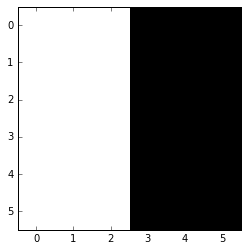

441.67295593
[[  0.   0.  90.  90.   0.   0.]
 [  0.   0.  90.  90.   0.   0.]
 [  0.   0.  90.  90.   0.   0.]
 [  0.   0.  90.  90.   0.   0.]
 [  0.   0.  90.  90.   0.   0.]
 [  0.   0.  90.  90.   0.   0.]]


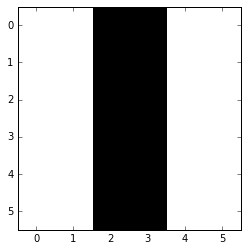

In [115]:
a = np.matrix('0 0 0 255 255 255; 0 0 0 255 255 255 ;0 0 0 255 255 255; 0 0 0 255 255 255; 0 0 0 255 255 255 ;0 0 0 255 255 255')
print (a)
plt.imshow(a, interpolation='nearest', cmap='Greys')
plt.show()

gradientx = np.gradient(a)[1]
gradienty = np.gradient(a)[0]
plt.imshow(gradientx, interpolation='nearest', cmap='Greys')
print (np.linalg.norm(np.gradient(a)))
print (np.arctan2(gradientx, gradienty) * 180 / np.pi)

In [94]:

data = imageiter(imgdir)   
print (data)
data.shape
transposed = data.transpose()
print (transposed)

[[  41.   15.   12. ...,   16.  108.   28.]
 [  32.  123.   25. ...,   17.   35.    4.]
 [  23.   12.    6. ...,   95.   45.    2.]
 ..., 
 [   2.    4.    5. ...,    3.   13.   29.]
 [  48.   21.    8. ...,   29.   12.    9.]
 [  25.  117.  117. ...,   15.    4.    9.]]
[[  41.   32.   23. ...,    2.   48.   25.]
 [  15.  123.   12. ...,    4.   21.  117.]
 [  12.   25.    6. ...,    5.    8.  117.]
 ..., 
 [  16.   17.   95. ...,    3.   29.   15.]
 [ 108.   35.   45. ...,   13.   12.    4.]
 [  28.    4.    2. ...,   29.    9.    9.]]


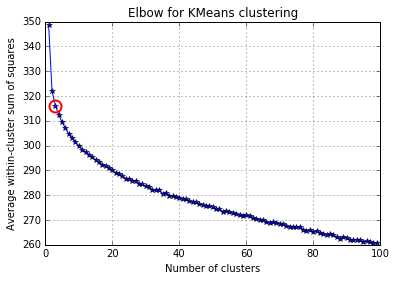

In [96]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##### cluster data into K=1..n clusters #####
K = range(1,100)
X = data
# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
#avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

# alternative: scipy.cluster.vq.vq
#Z = [vq(X,cent) for cent in centroids]
#avgWithinSS = [sum(dist)/X.shape[0] for (cIdx,dist) in Z]

# alternative: scipy.spatial.distance.cdist
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

##### plot ###
kIdx = 2

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')



# Clustering

## Clustering SIFT descriptors allows us to see what kind of classes they naturally fall into.

## This will show us what *kind* of features the algorithm should look for

## Data is plotted in 128 dimensions (as the sift descriptors provide us with 4x4 grids of pixels quantifying the magnitudes of edges in 8 orientations; 1 every pi/4 radians)


## From here, the number of times a particular class of feature appears in an image is counted. I've created 30 clusters of features. Below I've also clustered each "bag of words" (the count of each time a certain class of image occurs) into 4 clusters to predict its behavior in mayo scoring.

## A metric is also provided; a sillhouette score. This uses the mean intracluster distance and max distance to the nearest cluster for each cluster determined by the K-Nearest Neighbors algorithm to determine how well clusters are defined. Scores range from 1 to -1. 0 signifying overlapping clusters of data, 1 signifying well separated clusters with minimal overlap.

0.0462503


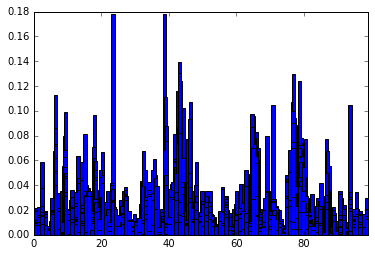

In [99]:
      
## creating a dictionary of 'visual words'; number of clusters defines number of words to cluster descriptors into.
## binnumber sets number of bins for a report of how many times each visual word appears. 
## ----- decrease to increase resistance to noise

siftcluster = 100
binnumber = 100
classcluster  = 4

k = siftcluster
k_means = cluster.KMeans(n_clusters=k, init ='k-means++', n_init=50, max_iter=1000)
k_means.fit(data) 
labels = k_means.labels_
centroids = k_means.cluster_centers_
firstfit = metrics.silhouette_score(data, labels, metric='cosine')

print(firstfit)

##histogramofwords creates counts how many times each visual word occurs in an image

histogramofwords = imagplot(imgdir, binnumber)
bagofwords = np.array(histogramofwords)


In [100]:
bow = histogramofwords.values()

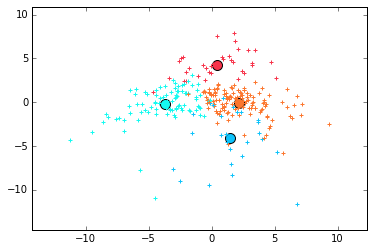

In [101]:
ka = 4
inflammclass = cluster.KMeans(n_clusters=ka, init ='k-means++', n_init=500, max_iter=1000)
inflammclass.fit(bow) 
mayolabels = inflammclass.labels_
mayocentroids = inflammclass.cluster_centers_
mlabel = np.array(mayolabels)
mcentroid = np.array(mayocentroids)

plot_cluster(np.array(bow), mcentroid, mlabel,4)

In [102]:
unlabeled = pd.DataFrame.from_dict(histogramofwords, orient = 'index')
unlabeled.to_csv('unlabeledroi.csv')
unlabeled

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
image275.png,0.004918,0.002459,0.000000,0.000000,0.002459,0.113105,0.007376,0.000000,0.029506,0.002459,...,0.000000,0.004918,0.002459,0.000000,0.004918,0.002459,0.002459,0.000000,0.000000,0.002459
image19.png,0.013131,0.008081,0.007071,0.013131,0.002020,0.014141,0.041414,0.013131,0.002020,0.013131,...,0.001010,0.006061,0.001010,0.000000,0.015152,0.007071,0.020202,0.007071,0.000000,0.009091
image251.png,0.021212,0.002020,0.008081,0.008081,0.000000,0.004040,0.047475,0.021212,0.001010,0.005051,...,0.001010,0.002020,0.002020,0.001010,0.007071,0.002020,0.009091,0.009091,0.000000,0.003030
image74.png,0.005486,0.005486,0.000000,0.005486,0.000000,0.005486,0.038402,0.005486,0.000000,0.054861,...,0.000000,0.000000,0.032916,0.005486,0.005486,0.005486,0.000000,0.016458,0.000000,0.016458
image252.png,0.021212,0.003030,0.013131,0.015152,0.002020,0.005051,0.055556,0.027273,0.002020,0.006061,...,0.000000,0.002020,0.001010,0.001010,0.008081,0.003030,0.010101,0.003030,0.001010,0.004040
image262.png,0.006061,0.004040,0.005051,0.011111,0.004040,0.012121,0.035354,0.014141,0.003030,0.029293,...,0.000000,0.005051,0.004040,0.004040,0.004040,0.005051,0.015152,0.004040,0.003030,0.009091
image2.png,0.071301,0.000000,0.035651,0.035651,0.000000,0.000000,0.000000,0.000000,0.000000,0.035651,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035651
image3.png,0.004555,0.004555,0.013666,0.009111,0.000000,0.000000,0.009111,0.000000,0.000000,0.009111,...,0.004555,0.000000,0.009111,0.004555,0.000000,0.104774,0.009111,0.000000,0.004555,0.004555
image38.png,0.010457,0.006274,0.012548,0.016730,0.004183,0.004183,0.037644,0.027187,0.002091,0.025096,...,0.000000,0.010457,0.008365,0.000000,0.008365,0.006274,0.008365,0.002091,0.002091,0.002091
image282.png,0.003030,0.003030,0.004040,0.007071,0.002020,0.006061,0.052525,0.015152,0.002020,0.024242,...,0.002020,0.006061,0.006061,0.000000,0.017172,0.008081,0.004040,0.003030,0.000000,0.002020


In [124]:
labeleddata = pd.DataFrame.from_csv('unlabeledroi.csv')
labeleddata = labeleddata.dropna()

In [125]:
labeleddata

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,labels
image1.png,0.005858,0.002929,0.000000,0.005858,0.000000,0.005858,0.067362,0.000000,0.000000,0.011715,...,0.000000,0.005858,0.000000,0.000000,0.000000,0.002929,0.002929,0.000000,0.002929,0
image10.png,0.003528,0.007055,0.003528,0.010583,0.001176,0.002352,0.031749,0.014111,0.002352,0.038805,...,0.009407,0.001176,0.001176,0.005880,0.004704,0.005880,0.004704,0.003528,0.004704,2
image100.png,0.002020,0.016162,0.003030,0.006061,0.001010,0.015152,0.013131,0.015152,0.006061,0.012121,...,0.002020,0.002020,0.003030,0.014141,0.009091,0.010101,0.006061,0.001010,0.007071,2
image101.png,0.018182,0.003030,0.004040,0.007071,0.001010,0.008081,0.070707,0.015152,0.000000,0.010101,...,0.002020,0.002020,0.000000,0.005051,0.000000,0.007071,0.001010,0.000000,0.001010,0
image102.png,0.007071,0.016162,0.019192,0.011111,0.005051,0.010101,0.031313,0.018182,0.009091,0.020202,...,0.006061,0.001010,0.000000,0.004040,0.009091,0.009091,0.004040,0.000000,0.013131,2
image103.png,0.004530,0.013589,0.006794,0.009059,0.000000,0.007927,0.049826,0.016986,0.003397,0.014721,...,0.003397,0.003397,0.002265,0.012456,0.003397,0.007927,0.002265,0.002265,0.006794,1
image104.png,0.001827,0.000000,0.016439,0.003653,0.000000,0.007306,0.040185,0.007306,0.005480,0.029225,...,0.005480,0.014613,0.001827,0.005480,0.001827,0.003653,0.001827,0.001827,0.003653,0
image105.png,0.013685,0.000000,0.018247,0.000000,0.004562,0.036493,0.018247,0.009123,0.018247,0.004562,...,0.000000,0.000000,0.004562,0.000000,0.013685,0.013685,0.000000,0.000000,0.004562,1
image106.png,0.016283,0.005428,0.005428,0.000000,0.016283,0.010855,0.016283,0.005428,0.021711,0.010855,...,0.000000,0.005428,0.000000,0.032566,0.010855,0.010855,0.000000,0.000000,0.005428,2
image107.png,0.008081,0.001010,0.010101,0.006061,0.001010,0.013131,0.077778,0.010101,0.000000,0.017172,...,0.003030,0.006061,0.000000,0.002020,0.002020,0.006061,0.004040,0.000000,0.009091,1


In [434]:
msk = np.random.rand(len(labeleddata)) < 0.8

training = labeleddata[msk]

testing = labeleddata[~msk]

training_data = np.array(training.ix[:,:-1])
training_labels = np.array(training['labels'])
training_labels=training_labels.astype(int)


testing_data = np.array(testing.ix[:,:-1])
testing_labels = np.array(testing['labels'])
testing_labels=testing_labels.astype(int)
len(testing_data)

53

# Classifying

## Data are shuffled and training and testing data are split from 80% and 20% of the data.

## Using Stochastic Gradient descent (a method in which weights are assigned to each parameter and are optimized with respect to how well they agree to the ground truth. This function is minimized), I have used the collection of visual words to classify images on their inflammation. However It should be noted while a 52% accuracy is not ideal, it does not miss most inflammation, albeit it may misclassify it. 


[[ 0.71428571  0.28571429  0.          0.        ]
 [ 0.20689655  0.65517241  0.10344828  0.03448276]
 [ 0.          0.2         0.7         0.1       ]
 [ 0.          0.          0.14285714  0.85714286]]
0.698113207547


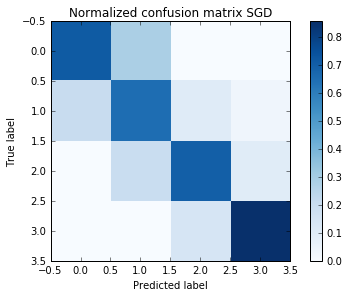

DescribeResult(nobs=3, minmax=(0.46590909090909088, 0.6588235294117647), mean=0.55881891941729667, variance=0.0093417470889538348, skewness=0.1341267599278918, kurtosis=-1.4999999999999991)

In [437]:

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import cross_validation
from scipy import stats


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



clf = SGDClassifier(fit_intercept=True, 
                    n_iter = 6000,
                    alpha=0.0001,
                    shuffle=True,
                    loss='modified_huber', 
                    penalty='l2',
                    class_weight = 'balanced',
                    n_jobs= -1,
                    average = True).fit(training_data, training_labels)

scores = cross_validation.cross_val_score(clf, labeleddata.ix[:,:-1], labeleddata['labels'], cv=3)


predictarr = clf.predict(testing_data)
trutharr = testing_labels

cm = confusion_matrix(trutharr, predictarr)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


#predictarr2 = clf2.predict(testing_data)
#trutharr2 = testing_labels
#cm2 = confusion_matrix(trutharr2, predictarr2)
#cm_normalized2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print (cm_normalized)
print (clf.score(testing_data,testing_labels))
#print (clfsvc.score(testing_data,testing_labels))
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix SGD')
plt.show()




stats.describe(scores)

In [438]:
print (metrics.classification_report(trutharr, 
                              predictarr, 
                              target_names=['0','1','2','3'], 
                              sample_weight=None, digits=2))

             precision    recall  f1-score   support

          0       0.45      0.71      0.56         7
          1       0.83      0.66      0.73        29
          2       0.64      0.70      0.67        10
          3       0.75      0.86      0.80         7

avg / total       0.73      0.70      0.70        53



In [48]:
testset = imagplot(additional, 30)
testset = np.array(testset.values())

prediction= clf.predict(testset)
prediction = prediction.tolist()


#import collections
#print (prediction)


labeler(prediction, additional)
#plot_cluster(bagofwords, mayocentroids, mayolabels,4)



NameError: global name 'k_means' is not defined

In [449]:
infbinary = pd.DataFrame.from_csv('inflammedbinary.csv')
infbinary=infbinary.loc[infbinary['labels'].notnull()]
infbinary

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,labels
image1.png,0.005858,0.002929,0.000000,0.005858,0.000000,0.005858,0.067362,0.000000,0.000000,0.011715,...,0.000000,0.005858,0.000000,0.000000,0.000000,0.002929,0.002929,0.000000,0.002929,0
image10.png,0.003528,0.007055,0.003528,0.010583,0.001176,0.002352,0.031749,0.014111,0.002352,0.038805,...,0.009407,0.001176,0.001176,0.005880,0.004704,0.005880,0.004704,0.003528,0.004704,1
image100.png,0.002020,0.016162,0.003030,0.006061,0.001010,0.015152,0.013131,0.015152,0.006061,0.012121,...,0.002020,0.002020,0.003030,0.014141,0.009091,0.010101,0.006061,0.001010,0.007071,1
image101.png,0.018182,0.003030,0.004040,0.007071,0.001010,0.008081,0.070707,0.015152,0.000000,0.010101,...,0.002020,0.002020,0.000000,0.005051,0.000000,0.007071,0.001010,0.000000,0.001010,0
image102.png,0.007071,0.016162,0.019192,0.011111,0.005051,0.010101,0.031313,0.018182,0.009091,0.020202,...,0.006061,0.001010,0.000000,0.004040,0.009091,0.009091,0.004040,0.000000,0.013131,1
image103.png,0.004530,0.013589,0.006794,0.009059,0.000000,0.007927,0.049826,0.016986,0.003397,0.014721,...,0.003397,0.003397,0.002265,0.012456,0.003397,0.007927,0.002265,0.002265,0.006794,1
image104.png,0.001827,0.000000,0.016439,0.003653,0.000000,0.007306,0.040185,0.007306,0.005480,0.029225,...,0.005480,0.014613,0.001827,0.005480,0.001827,0.003653,0.001827,0.001827,0.003653,0
image105.png,0.013685,0.000000,0.018247,0.000000,0.004562,0.036493,0.018247,0.009123,0.018247,0.004562,...,0.000000,0.000000,0.004562,0.000000,0.013685,0.013685,0.000000,0.000000,0.004562,1
image106.png,0.016283,0.005428,0.005428,0.000000,0.016283,0.010855,0.016283,0.005428,0.021711,0.010855,...,0.000000,0.005428,0.000000,0.032566,0.010855,0.010855,0.000000,0.000000,0.005428,1
image107.png,0.008081,0.001010,0.010101,0.006061,0.001010,0.013131,0.077778,0.010101,0.000000,0.017172,...,0.003030,0.006061,0.000000,0.002020,0.002020,0.006061,0.004040,0.000000,0.009091,1


In [502]:
msk = np.random.rand(len(infbinary)) < 0.8

trainingbin = infbinary[msk]

testingbin = infbinary[~msk]

training_databin = np.array(trainingbin.ix[:,:-1])
training_labelsbin = np.array(trainingbin['labels'])
training_labelsbin=training_labelsbin.astype(int)


testing_databin = np.array(testingbin.ix[:,:-1])
testing_labelsbin = np.array(testingbin['labels'])
testing_labelsbin=testing_labelsbin.astype(int)


[[ 6  1]
 [ 5 40]]
[[ 0.85714286  0.14285714]
 [ 0.11111111  0.88888889]]
0.942307692308


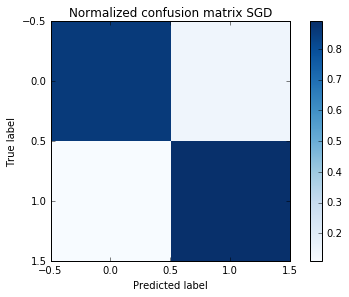

DescribeResult(nobs=5, minmax=(0.72727272727272729, 0.90000000000000002), mean=0.84909090909090901, variance=0.005892561983471073, skewness=-0.8907095444202648, kurtosis=-0.8284858046025674)


In [505]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



#clf = OutputCodeClassifier(SGDClassifier(fit_intercept=False, 
#                                         n_iter=20000, shuffle=False,
#                                         loss='perceptron', 
#                                         eta0=1, learning_rate='constant', 
#                                         penalty=None,  n_jobs=-1),code_size=30, random_state=0)

clfbin = SGDClassifier(fit_intercept=True, 
                    n_iter = 6000,
                    alpha=0.0001,
                    shuffle=True,
                    loss='modified_huber', 
                    penalty='l2',
                    class_weight = 'balanced',
                    n_jobs= -1,
                    average = True).fit(training_databin, training_labelsbin)





from sklearn.metrics import confusion_matrix
predictarr = clfbin.predict(testing_databin)
trutharr = testing_labelsbin
cm2 = confusion_matrix(trutharr, predictarr)
cm_normalized2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]



print (cm2)
print (cm_normalized2)
print (clf.score(testing_databin,testing_labelsbin))

plt.figure()
plot_confusion_matrix(cm_normalized2, title='Normalized confusion matrix SGD')
plt.show()



from sklearn import cross_validation
from scipy import stats
scores = cross_validation.cross_val_score(clf, testing_databin, testing_labelsbin, cv=5)

scores = stats.describe(scores)


print (scores)


In [504]:
print (metrics.classification_report(trutharr, 
                              predictarr, 
                              target_names=['0','1','2','3'], 
                              sample_weight=None, digits=2))

             precision    recall  f1-score   support

          0       0.55      0.86      0.67         7
          1       0.98      0.89      0.93        45

avg / total       0.92      0.88      0.89        52

